In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from scipy import stats

def metropolis_algorithm(rng, chain_start, n, logtarget, candidate_generating_density):
    x = chain_start
    chain = np.zeros(n)
    accepted = 0
    for i in range(n):
        candidate = candidate_generating_density(x)
        if candidate >= 0:
            if np.log(rng.uniform()) < logtarget(candidate) - logtarget(x):
                x = candidate
                accepted += 1
        
        chain[i] = x
        
    print(f"Acceptance rate {accepted/n}")
    return chain

Acceptance rate 0.47233


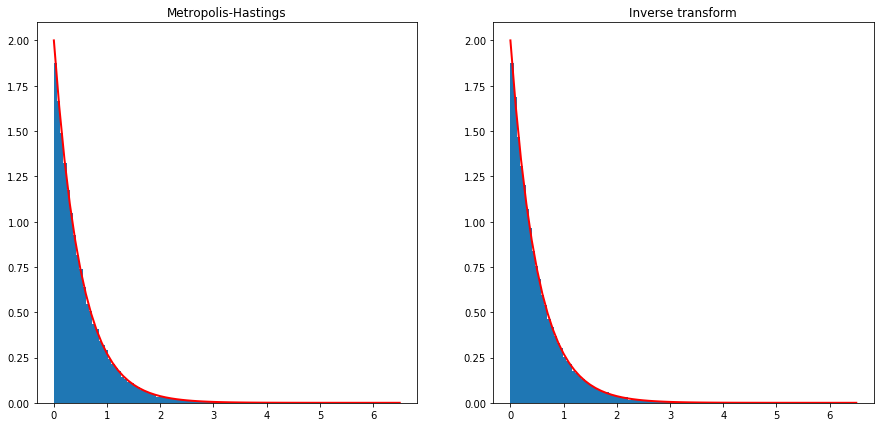

In [2]:
rng = RandomState(1729)

n = 10_00_000
param = 2
log_exponential = lambda x: np.log(param) - param * x
candidate_generating_density = lambda x: x + 0.60 * rng.normal()
chain = metropolis_algorithm(rng, (1/param), n, log_exponential, candidate_generating_density)
chain = chain[chain.size // 2:]
chain = chain[::10]

##########################################################################################
rng_2 = RandomState(88)
exponential_rvs = -(1 / param) * np.log(1 - rng_2.rand(chain.size))
##########################################################################################

fig, ax = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
width = 2
bins = 100
x = np.arange(0, max(chain) + 0.5, 0.1)

ax[0].hist(chain, bins, density=True)
ax[0].plot(x, param * np.exp(-param * x), linewidth=width, color="red")
ax[0].set_title("Metropolis-Hastings")

ax[1].hist(exponential_rvs, bins, density=True)
ax[1].plot(x, param * np.exp(-param * x), linewidth=width, color="red")
ax[1].set_title("Inverse transform")

plt.show()

In [3]:
print(stats.anderson(chain, dist="expon"))
print("--------------------------------------------------")
print(stats.anderson(exponential_rvs, dist="expon"))

AndersonResult(statistic=0.5561689854584984, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
--------------------------------------------------
AndersonResult(statistic=0.5178271921322448, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
